In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(25,10)})


In [2]:
# This is a function definition in Python that takes two arguments: `filename` and `new_filename`, both of which are strings. 
# The function reads the content of an Excel file using the pandas library's `read_excel` function and stores it in a dataframe object. 
# It then writes the contents of the dataframe object to a CSV file using the `to_csv` function,
# with the `index` parameter set to `None` and `header` parameter set to `True`. 
# The function returns `None`. This function can be used to convert an Excel file to a CSV file.

def transform_xls_to_csv(filename: str, new_filename: str) -> None:
    # Read and store content of an excel file 
    read_file = pd.read_excel (filename)
    # Write the dataframe object into csv file
    read_file.to_csv (new_filename, index = None, header=True)

In [3]:
# This code is defining a dictionary called `custom_dtype` that maps column names to their respective data types.
# The keys of the dictionary are the column names and the values are the data types. 
# The data types include `str` for string, and `float` for floating-point numbers. 
# This dictionary can be used to specify the data types of columns when reading data from a file or database.

custom_dtype = {'id': str,                        
                'pocket':str,
                'product':str,
                'status':str,
                'option':str,
                'guest_id':str,
                'booking_fees':float,
                'amount':float,
                'total_amount':float,
                'discount':float,
                'creation_date_hour':str,
                'beginning_date_hour':str,
                'begining_slice':str,
                'end_date_hour':str,
                'max_date_hour':str,
                'cxl_date_hour':str,
                'los':str,
                'lead_time_hours':float,
                'entry_date_hour':str,
                'exit_date_hour':str,
                'promo_code':str,
                'amount_promo':float}

In [4]:
# This code reads a CSV file named "bookings_without_onepark.csv" located in the "../raw_data/" 
# directory and stores the data in a pandas DataFrame called "df". The "dtype" parameter specifies
# the data types of the columns in the DataFrame, which are defined in a custom dictionary 
# called "custom_dtype". The "parse_dates" parameter specifies which columns should be parsed as datetime objects.
# In this case, the columns "creation_date_hour", "beginning_date_hour", and "end_date_hour" are being parsed as datetime objects.
df = pd.read_csv("../raw_data/bookings_without_onepark.csv", 
                 dtype=custom_dtype, 
                 parse_dates=['creation_date_hour','beginning_date_hour', 'end_date_hour'])

In [ ]:
# Check for nan values and transform them to unknown to count them and to 0 after
df = df.fillna('unknown')
df.isin(['unknown']).sum()
df.replace({'unknown': 0})

In [22]:
## NOT NEEDED RIGHT NOW ##

# Compute Z scores 
df['z_score_booking_fees'] = zscore(df['booking_fees'])
df['z_score_amount'] = zscore(df['amount'])
df['z_score_total_amount'] = zscore(df['total_amount'])
df['z_score_discount'] = zscore(df['discount'])

# Find outliers
outliers = df[abs(df['z_score_booking_fees']) > 3]

print(outliers)
print(len(outliers))

              id      pocket product     status   option    guest_id  \
32564    5497261  0000100435     H10   finished  premium  DCL0051721   
32741    5498845  0000100435     H10   finished  premium  DCL0382375   
33060    5501611  0000100435     H10   finished  premium  DCL0382118   
33066    5501688  0000100435     H10   finished  premium  DCL0382764   
33436    5505401  0000100435     H10   finished  premium  DCL0313253   
...          ...         ...     ...        ...      ...         ...   
535771  10273459  0000000025    F398  completed  premium  DCL0880274   
535811  10273802  0000000025     H10  completed  premium  DCL0682660   
536018  10275752  0000100435    F398  completed  premium  DCL0097916   
536043  10275903  0000100435    F398  completed  premium  DCL0248992   
536081  10276221  0000000025     H10  completed  premium  DCL0887448   

        booking_fees  amount  total_amount  discount  ...          los  \
32564            9.0    14.9          23.9       0.0  ...  06

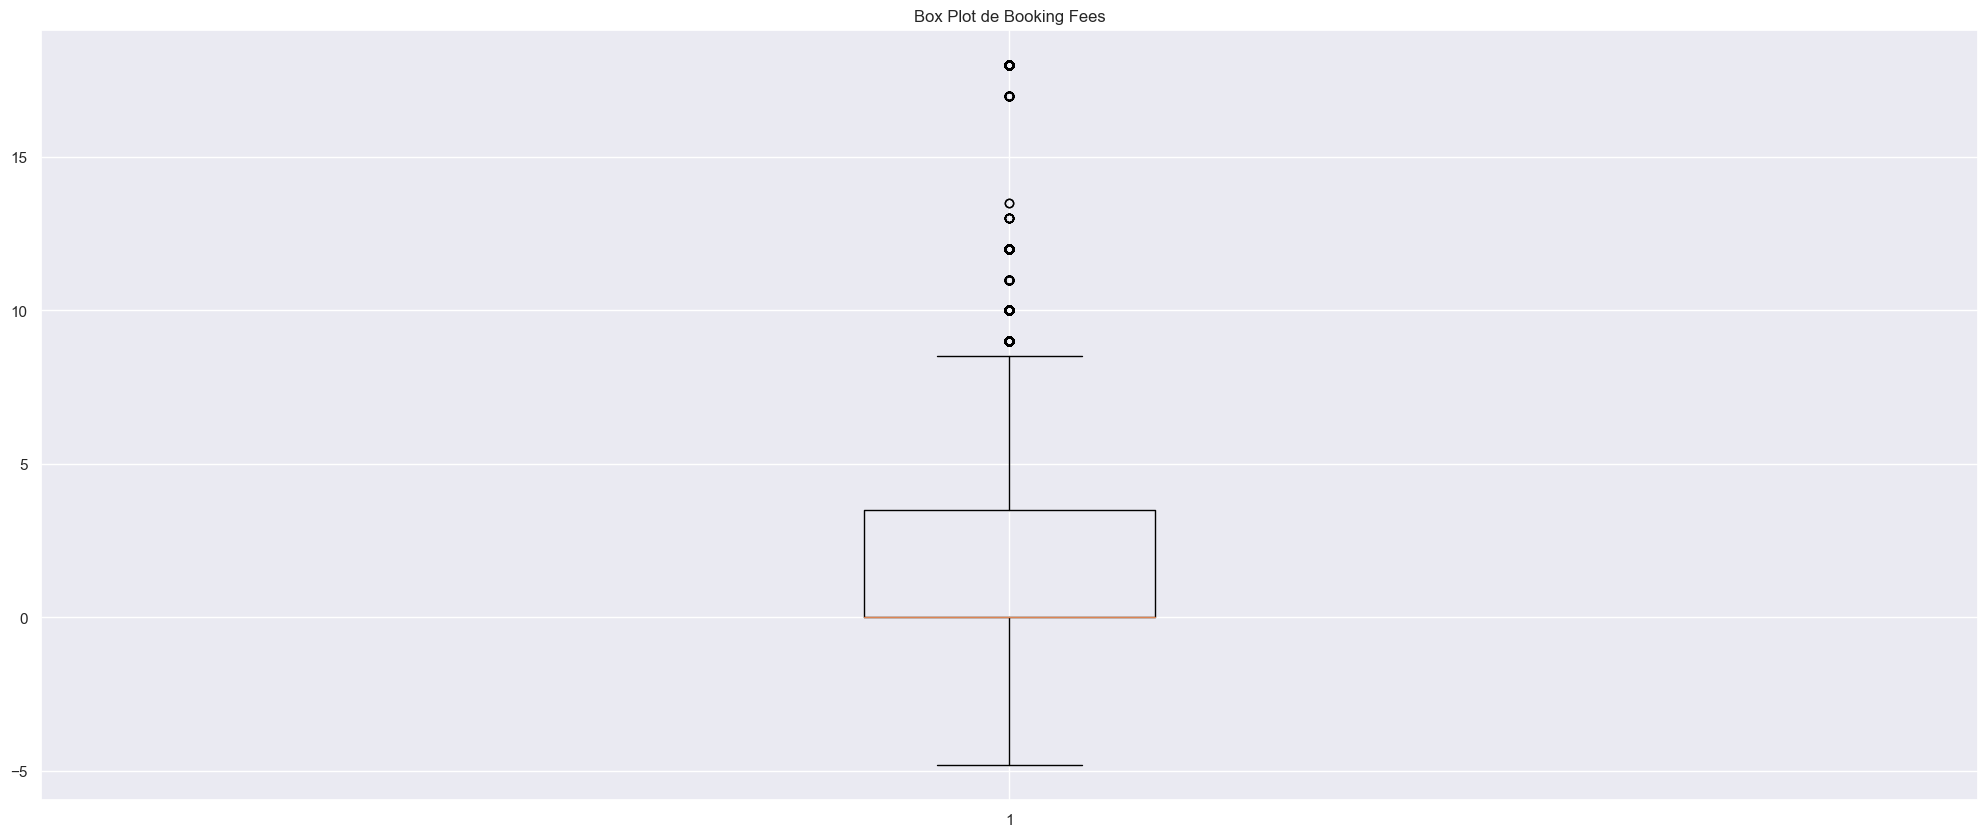

In [21]:
plt.figure()
plt.boxplot(df['booking_fees'].dropna())
plt.title('Box Plot de Booking Fees')
plt.show()

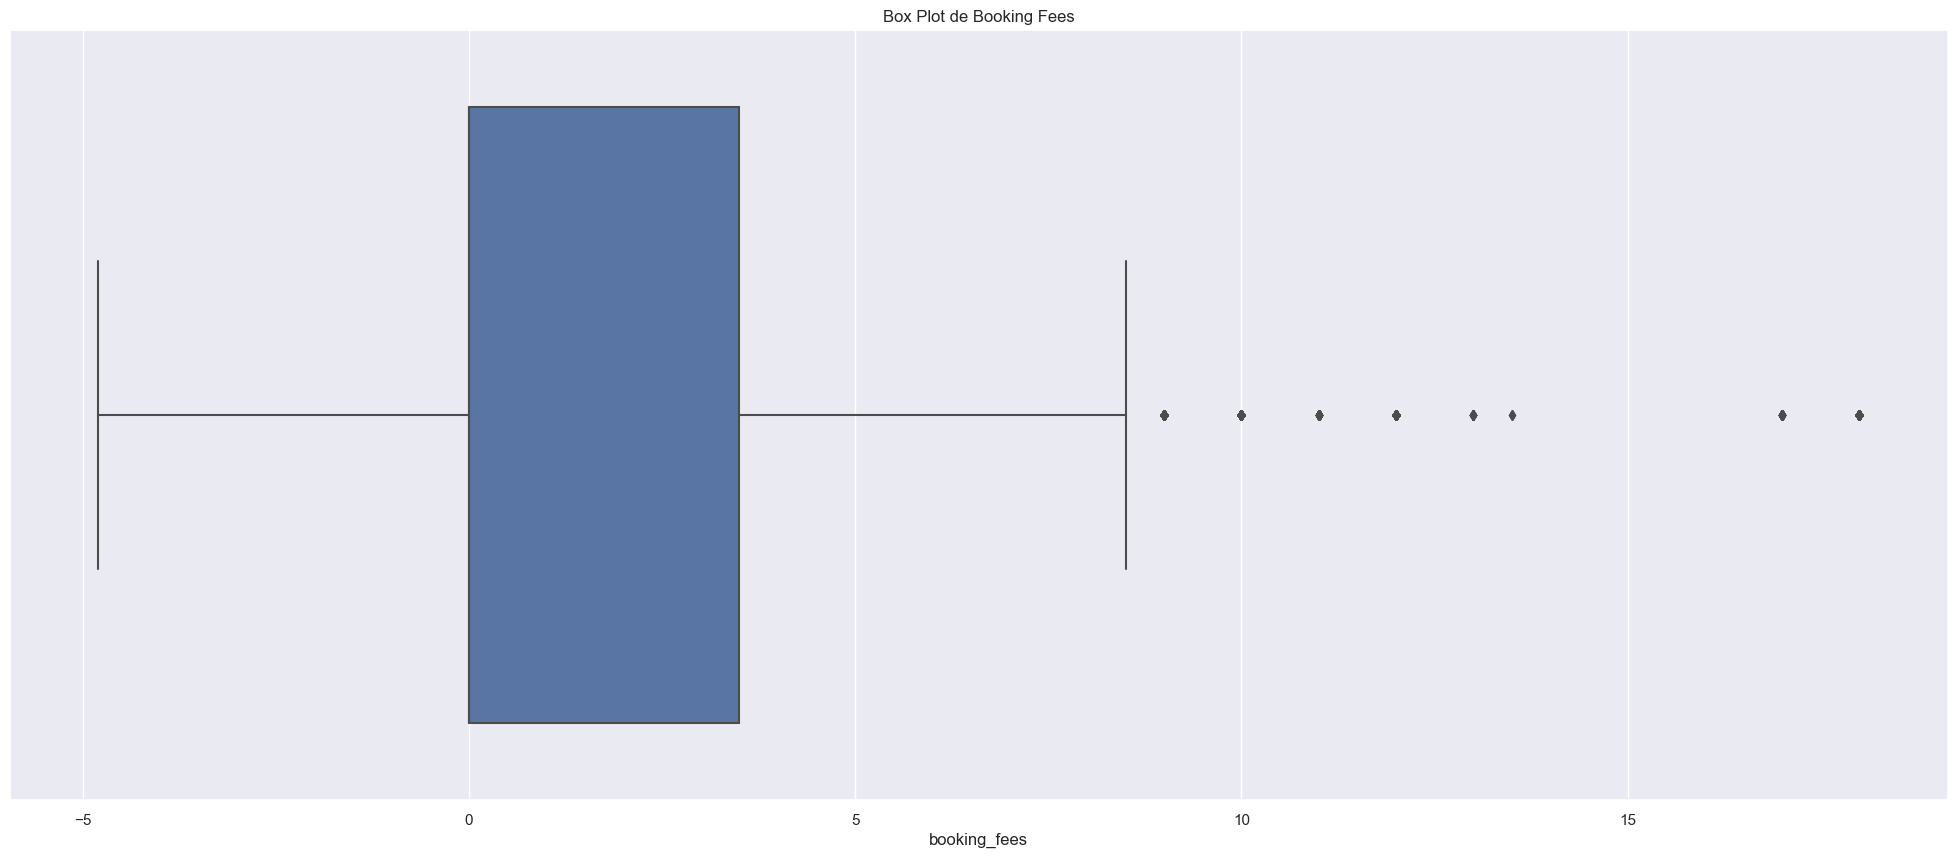

In [6]:
sns.boxplot(x=df['booking_fees'])
plt.title('Box Plot de Booking Fees')
plt.show()

In [12]:
# Creation of a dataframe with 1 entry for each day
dates = pd.date_range(start='2021-06-01', end='2023-06-20')
df_jours = pd.DataFrame(dates, columns=['date'])
df_jours['nb_entries'] = 0

In [13]:
df_jours.head()

,date,nb_entries
0,2021-06-01,0
1,2021-06-02,0
2,2021-06-03,0
3,2021-06-04,0
4,2021-06-05,0


In [14]:
# This code is iterating through each row of a DataFrame `df` and for each row, 
# it is extracting the values of the columns 'beginning_date_hour' and 'end_date_hour' 
# and storing them in variables `start` and `end` respectively.
for _, row in df.iterrows():
    start = row['beginning_date_hour']
    end = row['end_date_hour']
    df_jours.loc[(df_jours['date'] >= start) & (df_jours['date'] <= end), 'nb_entries'] += 1

In [15]:
df_jours.head()

,date,nb_entries
0,2021-06-01,398
1,2021-06-02,429
2,2021-06-03,454
3,2021-06-04,437
4,2021-06-05,744


In [23]:
# Save the df to csv 
#df_jours.to_csv("../prepared_data/01_06_2021_to_20_06_2023.csv", index=False)

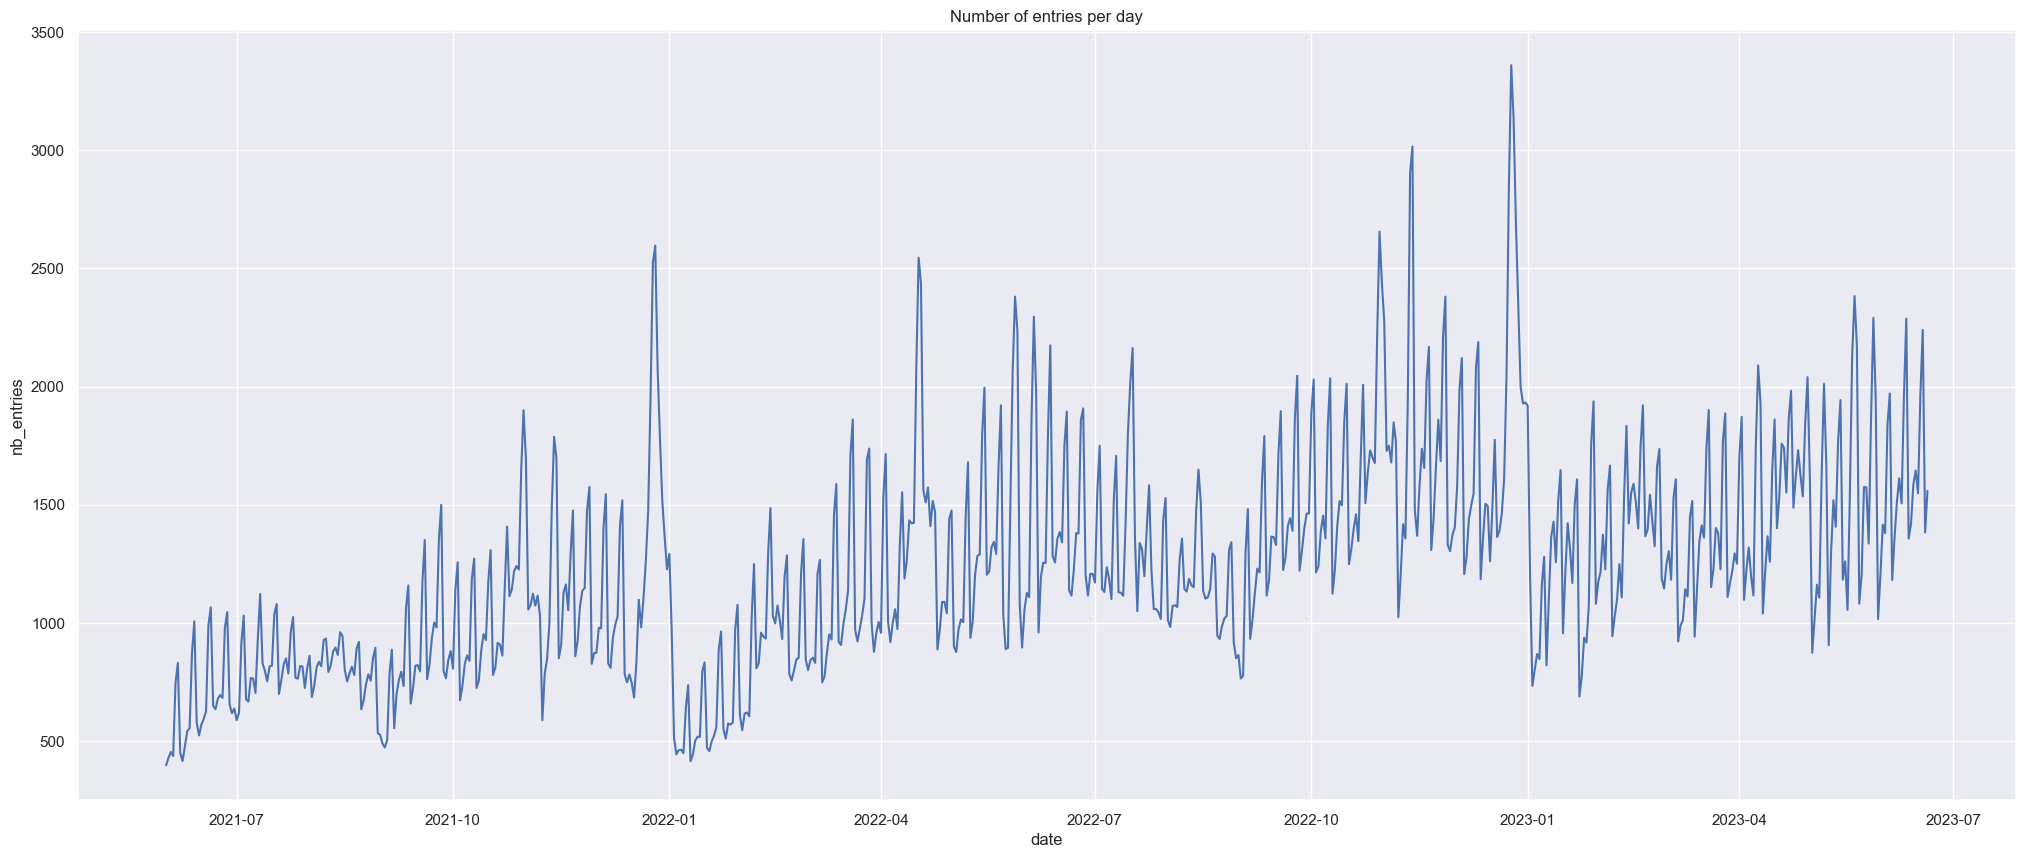

In [16]:
# Création du line plot
sns.lineplot(x='date', y='nb_entries', data=df_jours)

# Définition du titre du graphique
plt.title('Number of entries per day')

# Affichage du graphique
plt.show()

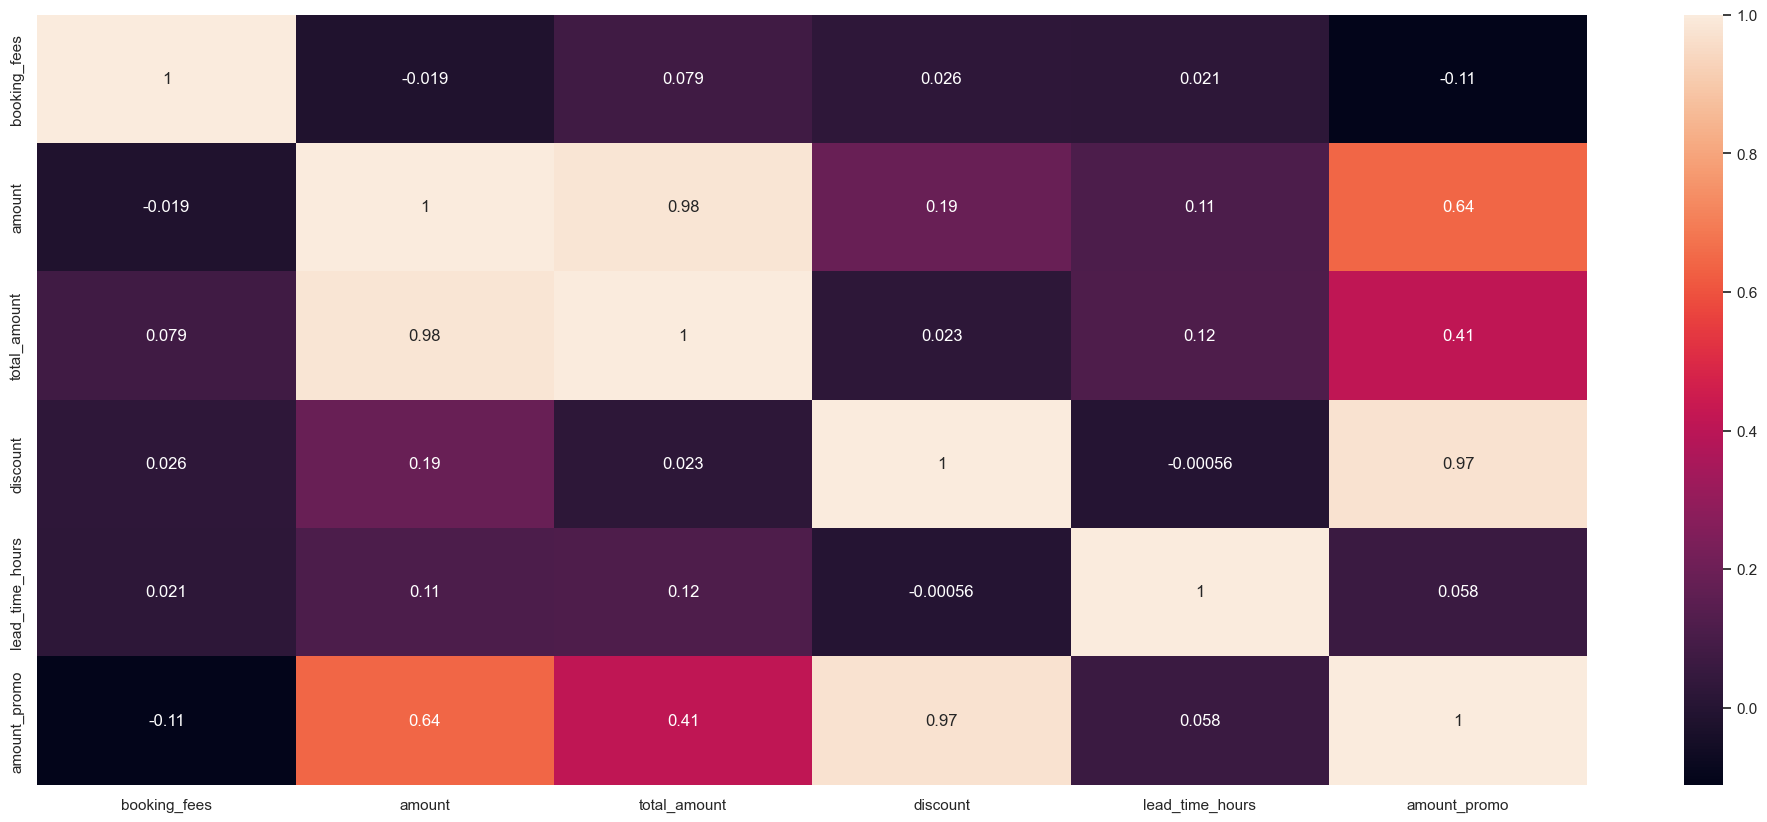

In [17]:
## NOT NEEDED RIGHT NOW, JUST EDA ##

# Filtrez le DataFrame pour ne garder que les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number])

# Calculez la matrice de corrélation
corr_matrix = numeric_cols.corr()

# Affichez la heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
## TEST FOR NEXT STEP ##
# This code prepares the data for a SARIMAX model by grouping 
# the data by date and calculating the total number of sales and statistics 
# for the exogenous variables. It also fills any missing values with 0 and 
# checks if the index is of type datetime. Finally, it sorts the data by date.

# Préparation des données pour le modèle SARIMAX
df['date'] = df['beginning_date_hour'].dt.date

# Regroupement par 'date' et calcul du nombre total de places vendues et des statistiques pour les variables exogènes
daily_data = df.groupby('date').agg({
    'id':'size', 
    'amount':'mean', 
    'amount_promo':'mean', 
    'booking_fees': 'mean',
    'discount': 'mean'}) 

daily_data.rename(columns={'id':'total_sales'}, inplace=True)

daily_data = daily_data.fillna(0) # cas de amount_promo

# Check if index est de type datetime
daily_data.index = pd.to_datetime(daily_data.index)

# Tri par date
daily_data.sort_index(inplace=True)

In [7]:
# La série temporelle
daily_data.index = pd.to_datetime(daily_data.index)

In [11]:
daily_data.drop

,total_sales,amount,amount_promo,booking_fees,discount
date,,,,,
2019-01-02,34.0,30.823529,5.67600,2.460294,0.834706
2019-01-03,53.0,31.569811,3.14500,3.089623,0.237358
2019-01-04,85.0,27.372941,5.97375,2.714353,1.124471
2019-01-05,50.0,31.762000,7.87200,2.449000,0.787200
2019-01-06,43.0,32.390698,4.78750,3.218605,0.445349
...,...,...,...,...,...
2023-12-30,NaN,NaN,NaN,NaN,NaN
2023-12-31,NaN,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN,NaN


In [10]:
# Définir la fréquence (ici quotidienne)
daily_data = daily_data.asfreq('D')
# Décomposition saisonnière pour déterminer la saisonnalité (si présente)
decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: This function does not handle missing values